In [34]:
import glob
import os
import csv
import numpy as np
import pandas as pd

In [48]:
output_path = './CIFAR10/'
exp_prefixes = ['RANDOM', 'LC', 'MARGIN', 'ENT', 'DBAL', 'BALD', 'CORESET', 'VAAL', 'ENS']
dataset_name = 'CIFAR10'
model = 'resnet18'
output_file_name = f'{dataset_name}_{model}_ALL.csv'

exp_list = []
for exp in exp_prefixes:
        exp_list.extend(glob.glob(os.path.join(output_path, model, '{}_*').format(exp)))

In [49]:
exp_list

['./CIFAR10/resnet18/RANDOM_3',
 './CIFAR10/resnet18/RANDOM_1',
 './CIFAR10/resnet18/RANDOM_2',
 './CIFAR10/resnet18/LC_2',
 './CIFAR10/resnet18/LC_1',
 './CIFAR10/resnet18/LC_3',
 './CIFAR10/resnet18/MARGIN_2',
 './CIFAR10/resnet18/MARGIN_1',
 './CIFAR10/resnet18/MARGIN_3',
 './CIFAR10/resnet18/ENT_2',
 './CIFAR10/resnet18/ENT_1',
 './CIFAR10/resnet18/ENT_3',
 './CIFAR10/resnet18/DBAL_3',
 './CIFAR10/resnet18/DBAL_2',
 './CIFAR10/resnet18/DBAL_1',
 './CIFAR10/resnet18/BALD_3',
 './CIFAR10/resnet18/BALD_1',
 './CIFAR10/resnet18/BALD_2',
 './CIFAR10/resnet18/CORESET_2',
 './CIFAR10/resnet18/CORESET_1',
 './CIFAR10/resnet18/CORESET_3',
 './CIFAR10/resnet18/VAAL_3',
 './CIFAR10/resnet18/VAAL_2',
 './CIFAR10/resnet18/VAAL_1',
 './CIFAR10/resnet18/ENS_2',
 './CIFAR10/resnet18/ENS_1',
 './CIFAR10/resnet18/ENS_3']

In [50]:
def exp_to_al_method(exp):
    if 'LC' in exp:
        return 'LeastConfidence'
    elif 'ENT' in exp:
        return 'MaxEntropy'
    elif 'MARGIN' in exp:
        return 'MinMargin'
    elif 'VAAL' in exp:
        return 'VAAL'
    elif 'CORESET' in exp:
        return 'Coreset'
    elif 'DBAL' in exp:
        return 'DBAL'
    elif 'BALD' in exp:
        return 'BALD'
    elif 'ENS' in exp:
        return 'ENSvarR'
    elif 'COG' in exp:
        return 'Center-of-Gravity'
    else:
        return 'Random'

In [51]:
columns = ['AL_Method', 'Episode', 'TestAccuracy']
data = []

In [52]:
for exp in exp_list:
    file_path = os.path.join(exp, 'plot_episode_yvalues.txt')
    file = open(file_path, "r")
    values = file.readlines()
    values = [float(v[:-1]) for v in values]
    data_tuple = []
    for idx in range(len(values)):
        data_tuple.append([exp_to_al_method(exp), idx, values[idx]])
    data.extend(data_tuple)

In [53]:
df = pd.DataFrame(data, columns = columns)
df.Episode = df.Episode.apply(lambda x: int((x+1)*10))

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('text', usetex=True)

plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"

sns.set_style("darkgrid")

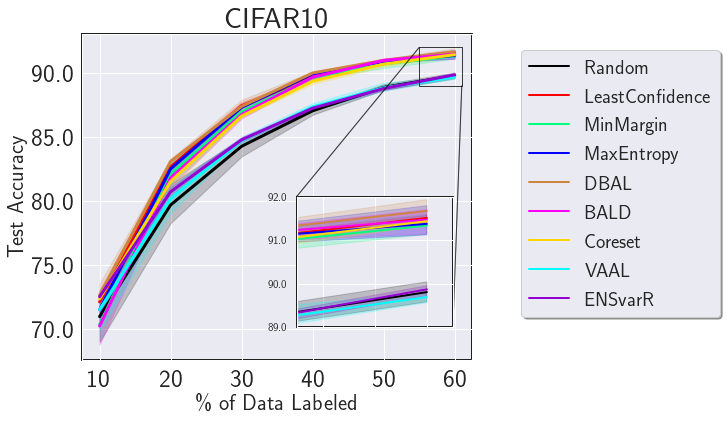

In [57]:

al_methods = ['LeastConfidence','MaxEntropy','MinMargin', 'ENSvarR','Coreset','VAAL', 'DBAL', 'Random',]
colors = ['black', 'red', 'springgreen',  'blue', 'peru', 'magenta', 'gold', 'cyan', 'darkviolet', 'orange']
colors = colors[:len(set(df.AL_Method))]

# print(index)
#     if index != 7:
#         continue
fig, ax = plt.subplots(figsize=(7,6))

sns.set(rc={"lines.linewidth": 2})
# sns.set_style("ticks")
sns.lineplot(x="Episode", y="TestAccuracy", hue="AL_Method", data=df, \
             ax=ax, palette=colors, linewidth = 3, legend=True)
ax.set_xlabel('\% of Data Labeled', size = 22, )
ax.set_ylabel('Test Accuracy', size = 22,)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')

ax.set_title(dataset_name, size = 30)

ax.legend(loc='lower left', bbox_to_anchor=(1.1, 0.1), shadow=True, markerscale=1, ncol=1, prop={'size': 20})

x_vals = np.arange(10,70,10)

xticks = ax.set_xticks(x_vals)
ax.set_xticklabels(ax.get_xticks(), size = 25)
ax.set_yticklabels(ax.get_yticks(), size = 25)  


axins2 = ax.inset_axes([0.55, 0.1, 0.4, 0.4])
sns.set_style("darkgrid")
# sub region of the original image
if dataset_name == 'CIFAR10':
    x1, x2, y1, y2 = 55, 61, 89, 92
else:
    x1, x2, y1, y2 = 55, 61, 52, 56.7
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins2, edgecolor="black")
sns.lineplot(x="Episode", y="TestAccuracy", hue="AL_Method", data=df,\
             ax=axins2, legend=False, palette=colors, linewidth=2)
axins2.set_xlabel("")
axins2.set_ylabel("")
axins2.set_xticklabels('')

axins2.set_yticklabels([str(round(float(label), 1)) for label in axins2.get_yticks()])
# axins2.set_yticklabels('')
axins2.patch.set_edgecolor('black')  
axins2.patch.set_linewidth('2')
axins2.tick_params(axis = "x", which = "both", bottom = False, top = False)

ax.indicate_inset_zoom(axins2, edgecolor="black")

plt.savefig(f'./{dataset_name}_AL.png', dpi=300, format='png', bbox_inches = "tight")
plt.show()

In [58]:
df2 = df.groupby(['AL_Method', 'Episode']).mean()['TestAccuracy'].reset_index()
df2.columns = ['AL_Method', 'Episode', 'Mean']
df2['SD'] = df.groupby(['AL_Method', 'Episode']).std()['TestAccuracy'].reset_index().TestAccuracy

In [59]:
df2.sort_values(['Mean', 'SD'], ascending=False).loc[df.Episode==60, :].iloc[:, [0, 2, 3]]

,AL_Method,Mean,SD
17,DBAL,91.670000,0.230651
29,LeastConfidence,91.510000,0.087178
5,BALD,91.470000,0.293087
11,Coreset,91.433333,0.090738
35,MaxEntropy,91.373333,0.363639
41,MinMargin,91.333333,0.234592
23,ENSvarR,89.866667,0.127410
47,Random,89.803333,0.230290
53,VAAL,89.690000,0.115326
